<a href="https://colab.research.google.com/github/JonAbaroa/PANDAS/blob/main/Codeacademy_3_Learn_Data_Analysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WORKING WITH MULTIPLE DATAFRAMES**


## **Lesson**



### **Introduction: Multiple DataFrames**

In order to efficiently store data, we often spread related information across multiple tables. In this lesson, we will learn the Pandas commands that help us work with data stored in multiple tables.

In [ ]:
import pandas as pd

orders = pd.read_csv('orders.csv')

products = pd.read_csv('products.csv')

customers = pd.read_csv('customers.csv')

print(orders)

print(products)

print(customers)

In [ ]:
products.head(1)

,product_id,description,price
0,1,thing-a-ma-jig,5


In [ ]:
orders.head(1)

,order_id,customer_id,product_id,quantity,timestamp
0,1,2,3,1,2017-01-01


### **Inner Merge I**

In [ ]:
import pandas as pd

orders = pd.read_csv('orders.csv')

products = pd.read_csv('products.csv')

customers = pd.read_csv('customers.csv')

order_3_description = "thing-a-ma-jig"
order_5_phone_number = "112-358-1321"

### **Inner Merge II**

he .merge method looks for columns that are common between two DataFrames and then looks for rows where those column’s values are the same. It then combines the matching rows into a single row in a new table.

In [ ]:
import pandas as pd

sales = pd.read_csv('sales.csv')
targets = pd.read_csv('targets.csv')
sales_vs_targets = pd.merge(sales, targets)

#sales_vs_targets = pd.merge(sales, targets)

sales.head(1)

,month,revenue
0,January,300


In [ ]:
targets.head(1)

,month,target
0,January,310


In [ ]:
sales_vs_targets.head(1)

,month,revenue,target
0,January,300,310


In [ ]:
crushing_it = sales_vs_targets[sales_vs_targets.revenue > sales_vs_targets.target]
print(crushing_it)

      month  revenue  target
1  February      290     270
2     March      310     300


### **Inner Merge III**

In [ ]:
import pandas as pd

sales = pd.read_csv('sales.csv')

targets = pd.read_csv('targets.csv')

men_women = pd.read_csv('men_women_sales.csv')

#all_data = sales.merge(targets)\
#	.merge(men_women)

all_data = sales.merge(targets)\
	.merge(men_women)

print(all_data)

results = all_data[(all_data.revenue > all_data.target) & (all_data.women > all_data.men)]

      month  revenue  target  men  women
0   January      300     310   30     35
1  February      290     270   29     35
2     March      310     300   31     29
3     April      325     350   32     28
4       May      475     475   47     50
5      June      495     500   49     45


In [ ]:
sales.head(1)

,month,revenue
0,January,300


In [ ]:
targets.head(1)

,month,target
0,January,310


In [ ]:
men_women.head(1)

,month,men,women
0,January,30,35


In [ ]:
# all_data = sales.merge(targets)\
#	.merge(men_women)

all_data.head()

,month,revenue,target,men,women
0,January,300,310,30,35
1,February,290,270,29,35
2,March,310,300,31,29
3,April,325,350,32,28
4,May,475,475,47,50


In [ ]:
# results = all_data[(all_data.revenue > all_data.target) & (all_data.women > all_data.men)]

print(results)

      month  revenue  target  men  women
1  February      290     270   29     35


### **Merge on Specific Columns**

In the previous example, the merge function “knew” how to combine tables based on the columns that were the same between two tables. For instance, products and orders both had a column called product_id. This won’t always be true when we want to perform a merge.

In [ ]:
import pandas as pd

orders2 = pd.read_csv('orders2.csv')

products2 = pd.read_csv('products2.csv')


In [ ]:
orders2.head(3)

,order_id,customer_id,product_id,quantity,timestamp
0,1,2,3,1,2017-01-01
1,2,2,2,3,2017-01-01
2,3,3,1,1,2017-01-01


In [ ]:
products2.head(3)

,id,description,price
0,1,thing-a-ma-jig,5
1,2,whatcha-ma-call-it,10
2,3,doo-hickey,7


In [ ]:
orders_products = pd.merge(orders2,products2.rename(columns={'id':'product_id'}))

orders_products.head(1)

,order_id,customer_id,product_id,quantity,timestamp,description,price
0,1,2,3,1,2017-01-01,doo-hickey,7


### **Merge on Specific Columns II**
In the previous exercise, we learned how to use rename to merge two DataFrames whose columns don’t match.

If we don’t want to do that, we have another option. We could use the keywords left_on and right_on to specify which columns we want to perform the merge on.

In [ ]:
import pandas as pd

orders2 = pd.read_csv('orders2.csv')
products2 = pd.read_csv('products2.csv')

# Use left_on and right_on to merge orders and products
orders_products = pd.merge(
	orders2,
	products2,
	left_on = 'product_id',
	right_on = 'id',
	suffixes = ['_orders', '_products']
)

print(orders_products)

   order_id  customer_id  product_id  ...  id         description  price
0         1            2           3  ...   3          doo-hickey      7
1         5            3           3  ...   3          doo-hickey      7
2         2            2           2  ...   2  whatcha-ma-call-it     10
3         4            3           2  ...   2  whatcha-ma-call-it     10
4         3            3           1  ...   1      thing-a-ma-jig      5
5         7            1           1  ...   1      thing-a-ma-jig      5
6         6            1           4  ...   4               gizmo      3
7         8            1           4  ...   4               gizmo      3

[8 rows x 8 columns]


In [ ]:
orders_products.head(1)

,order_id,customer_id,product_id,quantity,timestamp,id,description,price
0,1,2,3,1,2017-01-01,3,doo-hickey,7


In [ ]:
orders2.head(1)

,order_id,customer_id,product_id,quantity,timestamp
0,1,2,3,1,2017-01-01


In [ ]:
products2.head(1)

,id,description,price
0,1,thing-a-ma-jig,5


### **Mismatched Merges**


In [ ]:
import pandas as pd

orders4 = pd.read_csv('orders4.csv')
products4 = pd.read_csv('products4.csv')

print(orders4)
print(products4)

merged_df = pd.merge(orders4, products4)

print(merged_df)

   order_id  customer_id  product_id  quantity   timestamp
0         1            2           3         1  2017-01-01
1         2            2           2         3  2017-01-01
2         3            3           1         1  2017-01-01
3         4            3           2         2  2017-02-01
4         5            3           3         3  2017-02-01
5         6            1           4         2  2017-03-01
6         7            1           1         1  2017-02-02
7         8            1           4         1  2017-02-02
   product_id         description  price
0           1      thing-a-ma-jig      5
1           2  whatcha-ma-call-it     10
2           3          doo-hickey      7
3           4               gizmo      3
   order_id  customer_id  product_id  ...   timestamp         description price
0         1            2           3  ...  2017-01-01          doo-hickey     7
1         5            3           3  ...  2017-02-01          doo-hickey     7
2         2            2

### **Outer Merge**
In the previous exercise, we saw that when we merge two DataFrames whose rows don’t match perfectly, we lose the unmatched rows.

This type of merge (where we only include matching rows) is called an inner merge. There are other types of merges that we can use when we want to keep information from the unmatched rows.

In [ ]:
import pandas as pd

store_a = pd.read_csv('store_a.csv')
print(store_a)
store_b = pd.read_csv('store_b.csv')
print(store_b)

store_a_b_outer = pd.merge(store_a, store_b, how='outer')

print(store_a_b_outer)

          item  store_a_inventory
0       hammer                 12
1  screwdriver                 15
2        nails                200
3       screws                350
4          saw                  6
5    duct tape                150
6       wrench                 12
7     pvc pipe                 54
            item  store_b_inventory
0         hammer                  6
1          nails                250
2            saw                  6
3      duct tape                150
4       pvc pipe                 54
5           rake                 10
6         shovel                 15
7  wooden dowels                192
             item  store_a_inventory  store_b_inventory
0          hammer               12.0                6.0
1     screwdriver               15.0                NaN
2           nails              200.0              250.0
3          screws              350.0                NaN
4             saw                6.0                6.0
5       duct tape              150

### **Left and Right Merge**

Let’s return to the merge of Company A and Company B.

Left Merge

In [ ]:
import pandas as pd

store_a = pd.read_csv('store_a.csv')
print(store_a)

store_b = pd.read_csv('store_b.csv')
print(store_b)

store_a_b_left = pd.merge(store_a, store_b, how='left')

store_b_a_left = pd.merge(store_b, store_a, how='left')



          item  store_a_inventory
0       hammer                 12
1  screwdriver                 15
2        nails                200
3       screws                350
4          saw                  6
5    duct tape                150
6       wrench                 12
7     pvc pipe                 54
            item  store_b_inventory
0         hammer                  6
1          nails                250
2            saw                  6
3      duct tape                150
4       pvc pipe                 54
5           rake                 10
6         shovel                 15
7  wooden dowels                192


In [ ]:
print(store_a_b_left)

print(store_b_a_left)

          item  store_a_inventory  store_b_inventory
0       hammer                 12                6.0
1  screwdriver                 15                NaN
2        nails                200              250.0
3       screws                350                NaN
4          saw                  6                6.0
5    duct tape                150              150.0
6       wrench                 12                NaN
7     pvc pipe                 54               54.0
            item  store_b_inventory  store_a_inventory
0         hammer                  6               12.0
1          nails                250              200.0
2            saw                  6                6.0
3      duct tape                150              150.0
4       pvc pipe                 54               54.0
5           rake                 10                NaN
6         shovel                 15                NaN
7  wooden dowels                192                NaN


### **Concatenate DataFrames**

Sometimes, a dataset is broken into multiple tables. For instance, data is often split into multiple CSV files so that each download is smaller.

In [ ]:
import pandas as pd

bakery = pd.read_csv('bakery.csv')
print(bakery)

ice_cream = pd.read_csv('ice_cream.csv')
print(ice_cream)

# Concatenate the two menus to form a new menu
menu = pd.concat([bakery, ice_cream])



                  item  price
0               cookie   2.50
1              brownie   3.50
2        slice of cake   4.75
3  slice of cheesecake   4.75
4         slice of pie   5.00
                              item  price
0     scoop of chocolate ice cream   3.00
1       scoop of vanilla ice cream   2.95
2    scoop of strawberry ice cream   3.05
3  scoop of cookie dough ice cream   3.25


In [ ]:
print(menu)

                              item  price
0                           cookie   2.50
1                          brownie   3.50
2                    slice of cake   4.75
3              slice of cheesecake   4.75
4                     slice of pie   5.00
0     scoop of chocolate ice cream   3.00
1       scoop of vanilla ice cream   2.95
2    scoop of strawberry ice cream   3.05
3  scoop of cookie dough ice cream   3.25


### **Review**

In [ ]:
import pandas as pd

visits = pd.read_csv('visits.csv',
                        parse_dates=[1])

checkouts = pd.read_csv('checkouts.csv',
                        parse_dates=[1])

In [ ]:
# Part 1: print to inspect each DataFrame
print(visits.head(10))
print(checkouts.head(10))

In [ ]:
# Part 2: merge visits and checkouts
v_to_c = pd.merge(visits, checkouts)

In [ ]:
# Part 3: define the column time to be the different between checkout time and visit time
v_to_c['time'] = v_to_c.checkout_time - v_to_c.visit_time

In [ ]:
print(v_to_c.time.mean())

## **Quiz**


## **Project**

## **Ficha Tecnica**

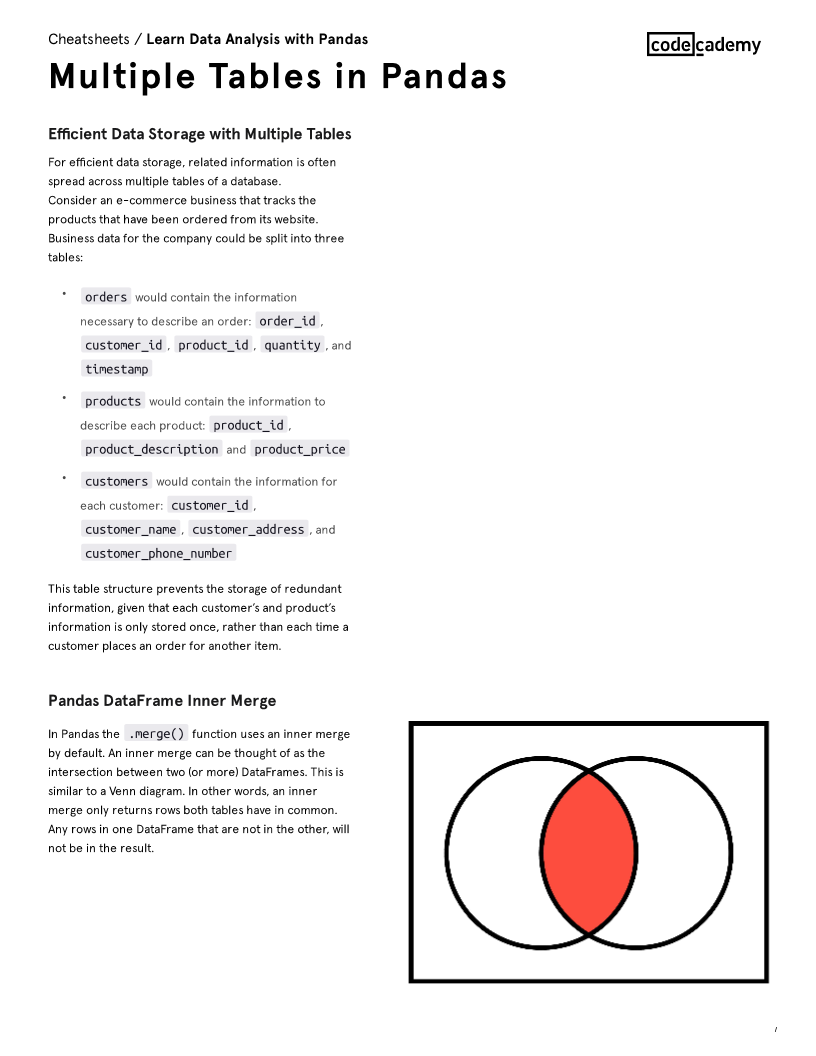